# **Navigate to the datasets directory**

In [2]:
%cd drive/MyDrive/datasets/academic

[Errno 2] No such file or directory: 'drive/MyDrive/datasets/academic'
/content/drive/MyDrive/datasets/academic


# **Import Necessary Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold,  cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# **Load Train and Test data**

In [44]:
df = pd.read_csv('train.csv')

# **Explore the data**

In [24]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2


In [6]:
df.shape

(76518, 38)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [8]:
df.nunique()

id                                                76518
Marital status                                        6
Application mode                                     22
Application order                                     8
Course                                               19
Daytime/evening attendance                            2
Previous qualification                               21
Previous qualification (grade)                      110
Nacionality                                          18
Mother's qualification                               35
Father's qualification                               39
Mother's occupation                                  40
Father's occupation                                  56
Admission grade                                     668
Displaced                                             2
Educational special needs                             2
Debtor                                                2
Tuition fees up to date                         

In [9]:
df.duplicated().sum()

0

In [10]:
df.Target.value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [11]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


As there is an ordinal relationship between our categories (e.g., Low, Medium, High), we can use label encoding.

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

<Axes: >

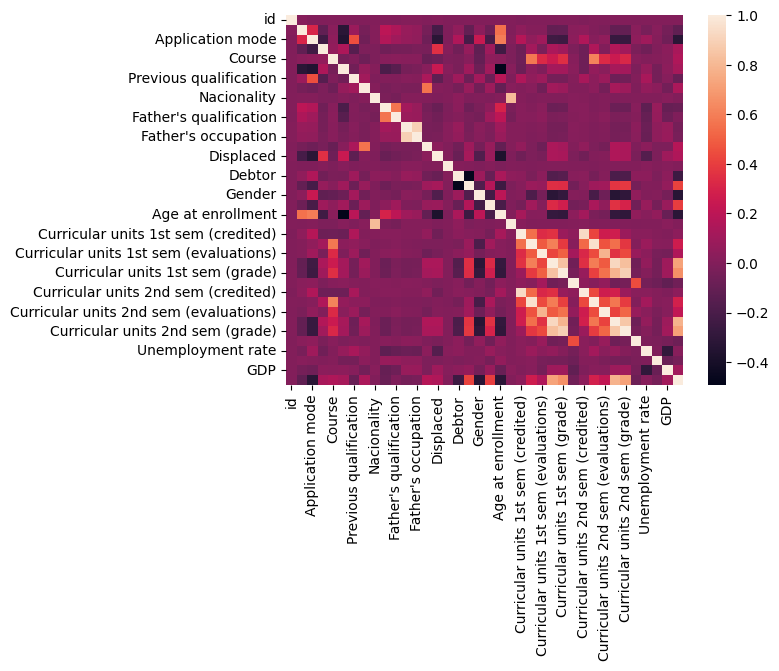

In [13]:
sns.heatmap(df.corr())

**We can see very much Multicollinearity among the independent variables**

# **Data Visualization**

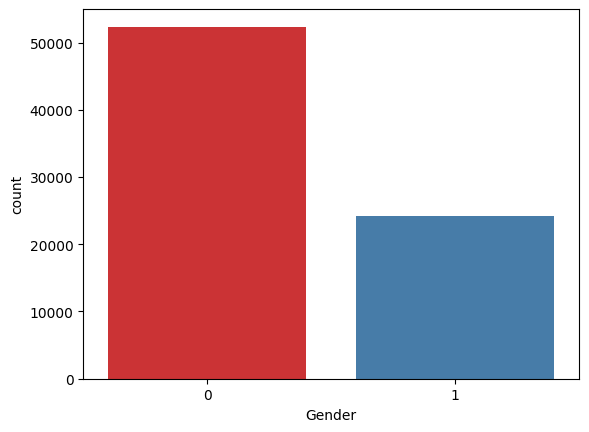

In [21]:
sns.countplot(data=df,x='Gender',palette='Set1');

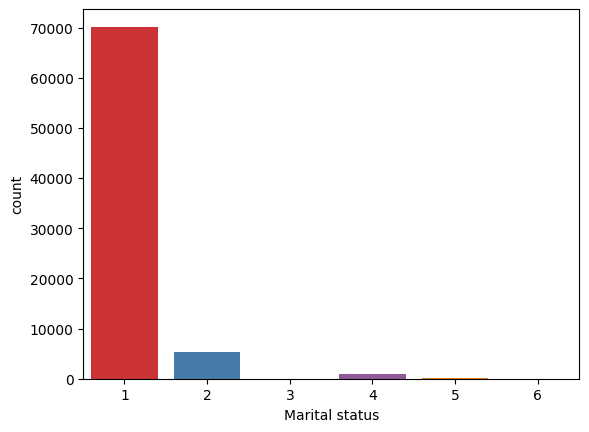

In [22]:
sns.countplot(data=df,x='Marital status',palette='Set1');

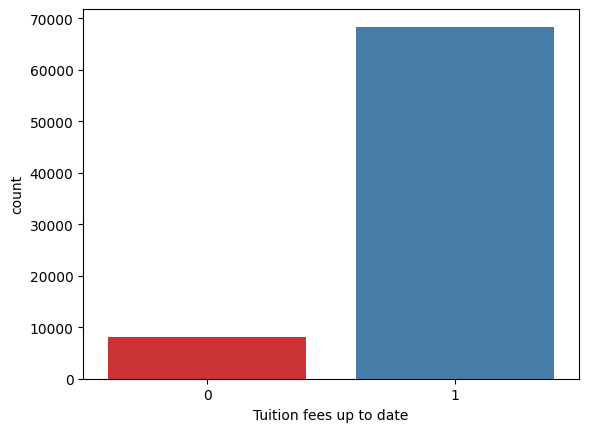

In [16]:
sns.countplot(data=df,x='Tuition fees up to date',palette='Set1');


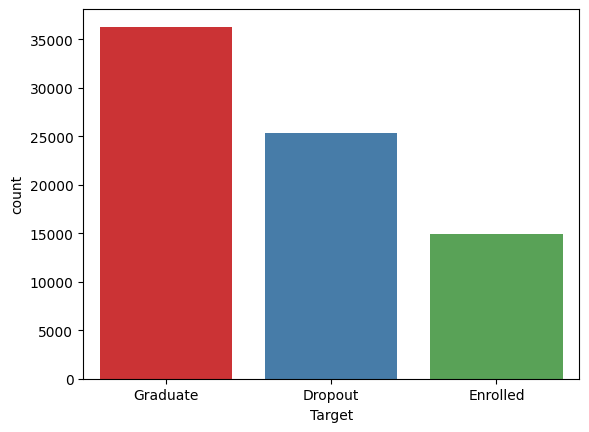

In [45]:
sns.countplot(data=df,x='Target',palette='Set1');

**Tutition Fess upto date 1 is quite higher than upto date 0**

# **Split the datasets**

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

# Separate the independent and dependent variables
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Dimensionality Reduction**

**Findings Number of Components for PCA**

---

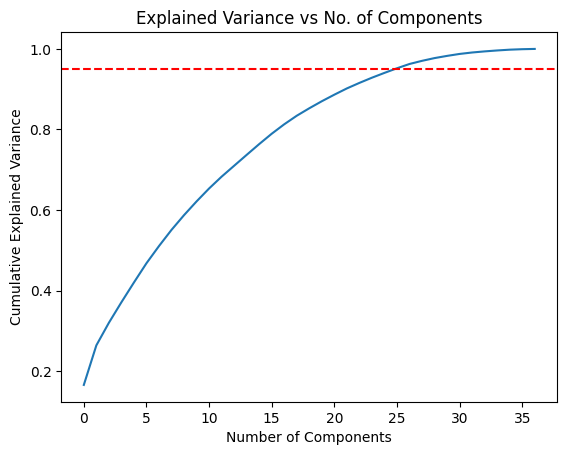

In [49]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# # standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs No. of Components')
plt.axhline(y=0.95, color='r', linestyle = '--')
plt.show()

In [50]:
# Choose number of components to explain 95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) #+1
print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 25


**Now lets apply Principal Component Analysis with 25 Components**

---



In [38]:
# Fit PCA with 25 components
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

#create a new DataFrame with the reduced dimensions
colums = [f"PC{i+1}" for i in range(n_components)]
df_reduced = pd.DataFrame(X_train_reduced, columns=colums)


df_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,2.418885,1.850726,-0.981148,-1.557985,2.693015,-0.395026,1.911235,0.358931,0.335965,1.239371,...,0.914306,1.463191,-0.597084,0.086862,-1.507567,-0.549109,-0.592374,-0.214000,-0.337654,0.456448
1,0.396665,-0.249926,-1.441290,0.405771,-1.294900,0.042088,1.376004,-0.570763,0.145369,-1.924208,...,1.557034,-0.047076,0.654128,0.302372,-0.525934,0.088613,-0.816454,0.226792,0.230292,0.119761
2,1.026711,-1.091506,1.478932,-0.651175,0.764638,0.099942,-0.998610,0.865799,0.491292,0.819919,...,-1.127013,0.615984,-0.126820,0.442877,-1.140897,0.562278,-0.448065,-0.310848,0.353749,0.100255
3,-6.498661,-2.988447,-1.495066,0.365016,0.660120,-1.298453,-1.091857,0.042057,-3.556072,-1.462573,...,0.036395,0.316295,0.698510,0.183379,1.045468,-0.324565,0.942554,0.053624,-0.327682,0.191141
4,-1.539227,2.490125,-0.356525,-0.413524,-1.319111,0.883813,0.671681,0.211529,-0.911804,-0.207727,...,-0.474958,-1.019383,-0.111065,0.599208,-0.660756,0.195488,0.871568,-0.956396,0.864588,-0.636556


In [37]:
type(X_test_reduced)

numpy.ndarray

# **MOdeling**

### **Function for displaying Classification Report**

In [80]:
def display_classification_metrics(y_true, y_pred):
  """
  This function displays the classification report and confusion matrix for a given set of true and predicted labels.

  Args:
    y_true: The true labels.
    y_pred: The predicted labels.
  """

  # Print the classification report
  print(classification_report(y_true, y_pred))

  # Generate the confusion matrix and plot it
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
  plt.show()

**Modeling without Dimensionality reduction**

In [71]:
skfold = StratifiedKFold(n_splits=5)
model = RandomForestClassifier()
results = cross_val_score(model, X_train, y_train, cv=skfold)
print(results.mean())

0.8247133233767554


In [73]:
results

array([0.82781998, 0.82471616, 0.82128563, 0.82365433, 0.82609051])

**Try on PCA data**

In [59]:
# Train on PCA data
results = cross_val_score(model, X_train_reduced, y_train, cv=skfold)
print(results.mean())

0.8035907438440628


In [60]:
results

array([0.80691007, 0.79972229, 0.80078412, 0.80315282, 0.80738441])

# **Hyperparameter Tuning**

**Hyperparameter tuning without Dimensionality reduction**

In [55]:
 param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add other hyperparameters to tune
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skfold)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [57]:
# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [58]:
print("Best Model : ", best_model)
print("Best Score : ",best_score)

Best Model :  RandomForestClassifier(max_depth=20, n_estimators=200)
Best Score :  0.8248603181426464


In [65]:
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.93      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304



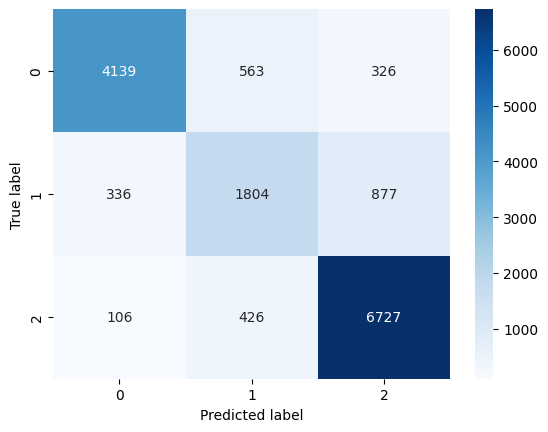

In [66]:
display_classification_metrics(y_test, y_pred)

In [67]:
# Give accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8278881338212232


# **Conclusion**

### **Results without Dimensionality Reduction:**

- **Cross-validation score without PCA: 82.42%**
- **Best score without PCA: 82.78%**

### **Results with Dimensionality Reduction:**

- **Accuracy with PCA: 80.35%**

### **Summary:**

- **Dimensionality reduction with PCA slightly decreased the cross-validation score and accuracy.**
- **Hyperparameter tuning improved the performance without PCA.**
- **The model without PCA achieved a slightly better performance than the model with PCA. It is because most of the data were already in binary and ordinal format**

<div style="color:red">
<p>Note: We have beat the baseline accuracy of 60% from all the models.</p>
</div>